In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv( "C:/Users/sweth/Downloads/archive (8)/spotify_tracks.csv")

In [3]:
df.shape

(6300, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


In [5]:
df.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [6]:
df.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit'],
      dtype='object')

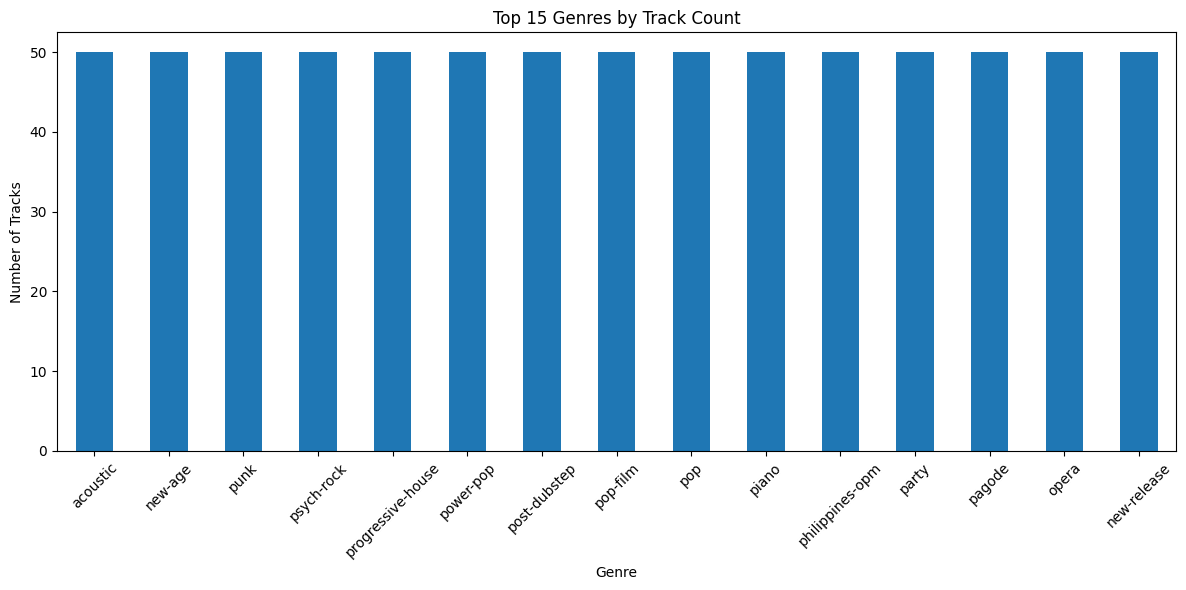

In [7]:
plt.figure(figsize=(12, 6))
df['genre'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Genres by Track Count")
plt.xlabel("Genre")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Above bar chart displays the top 15 genres with the highest number of tracks in the dataset. Each genre is equally represented with 50 tracks, suggesting a balanced sampling approach was used across genres for analysis consistency.

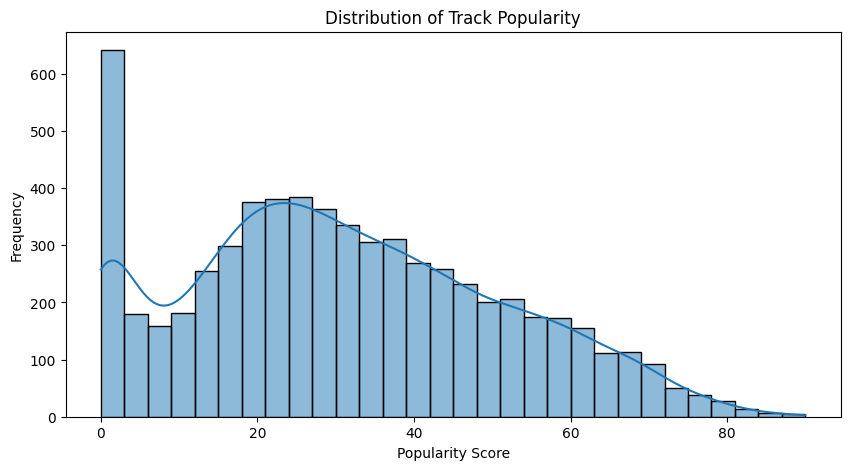

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.show()


This histogram shows the distribution of track popularity scores. Most tracks have low popularity (0–20), and only a few reach high popularity levels. The curve reveals a right-skewed distribution, indicating popular tracks are rare in the dataset.

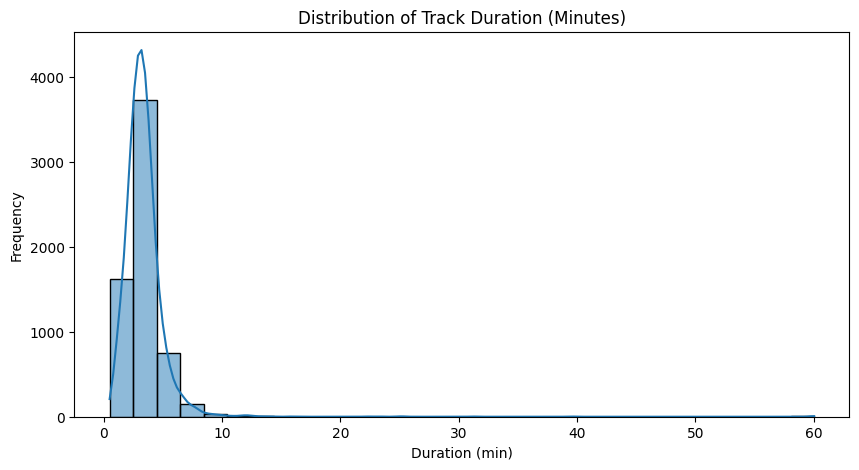

In [9]:
# Convert to minutes
df['duration_min'] = df['duration_ms'] / 60000

plt.figure(figsize=(10, 5))
sns.histplot(df['duration_min'], bins=30, kde=True)
plt.title("Distribution of Track Duration (Minutes)")
plt.xlabel("Duration (min)")
plt.ylabel("Frequency")
plt.show()


Above chart illustrates the duration of tracks in minutes. Most tracks fall within the 2–5 minute range, while a few outliers exceed 10 minutes. The long right tail shows occasional extended tracks, typical in live recordings or instrumental pieces

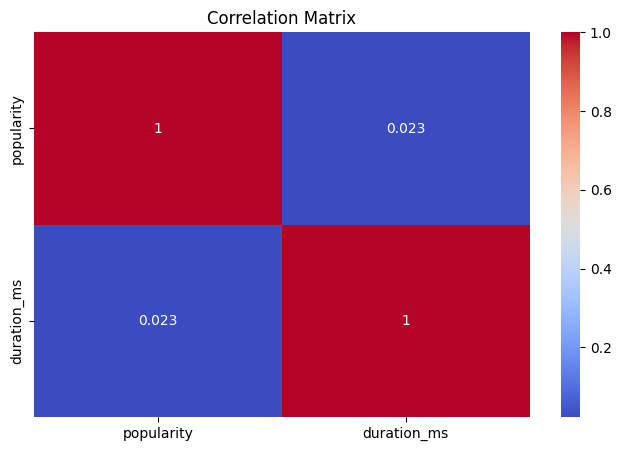

In [10]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['popularity', 'duration_ms']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


The heatmap shows the correlation between track popularity and duration. With a correlation coefficient of only 0.023, the chart confirms there is virtually no linear relationship between how long a track is and how popular it is.

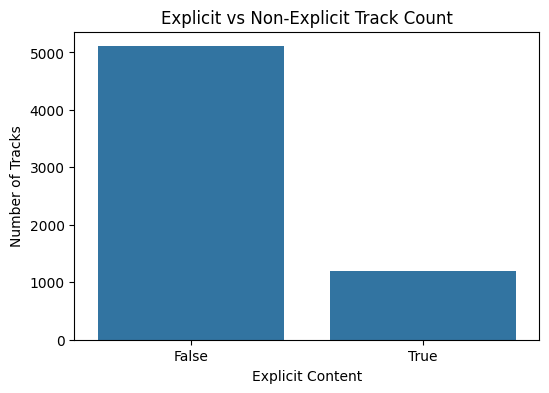

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='explicit', data=df)
plt.title("Explicit vs Non-Explicit Track Count")
plt.xlabel("Explicit Content")
plt.ylabel("Number of Tracks")
plt.show()


This bar chart shows the distribution of tracks based on explicit content. The majority of tracks are non-explicit, while explicit tracks make up a smaller portion, highlighting a general preference for cleaner content in the dataset.

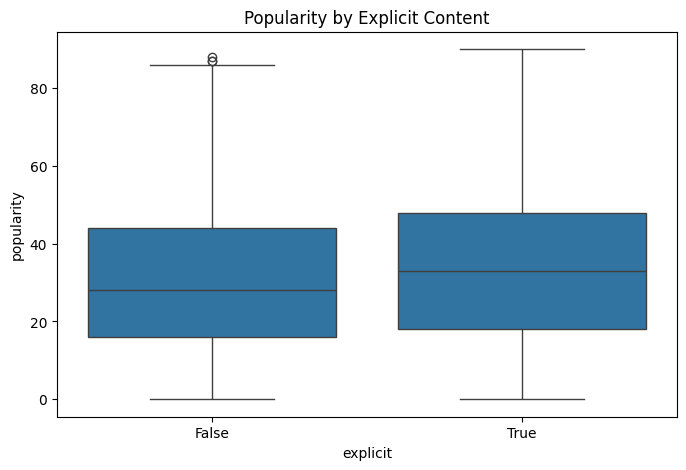

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title("Popularity by Explicit Content")
plt.show()


This boxplot compares the popularity of tracks marked as explicit (True) and non-explicit (False). While explicit tracks show a slightly higher median popularity, the overall distribution of popularity is similar across both categories, with a few high-popularity outliers

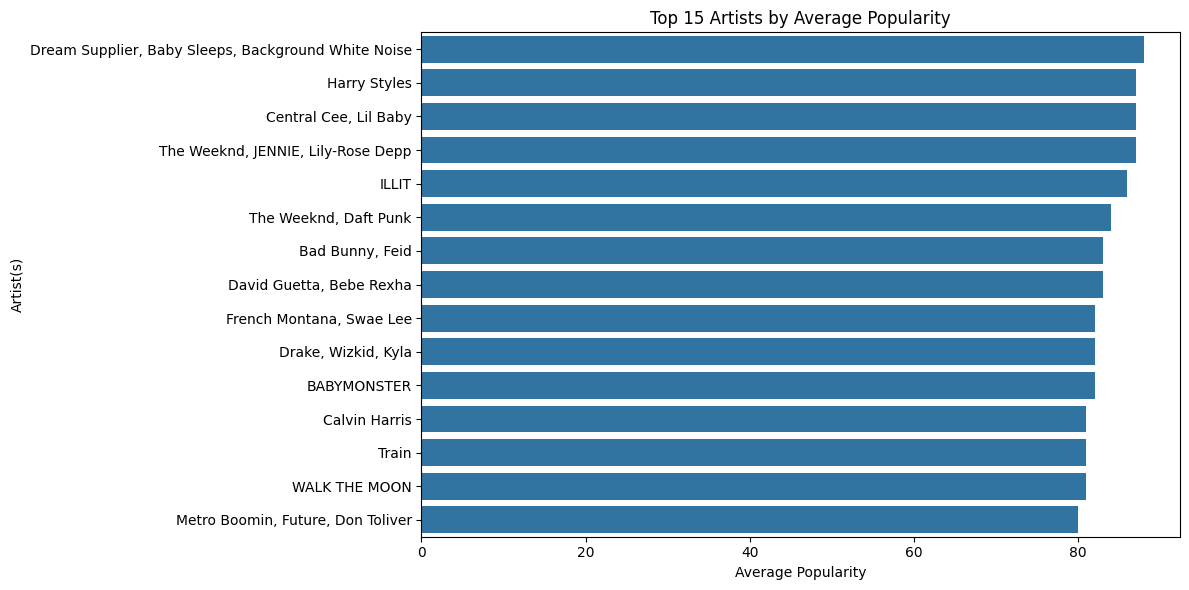

In [13]:
 #Group by artist and calculate average popularity
top_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(15)

# Convert to DataFrame
top_artists_df = top_artists.reset_index().rename(columns={'popularity': 'avg_popularity'})

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_popularity', y='artists', data=top_artists_df)
plt.title("Top 15 Artists by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Artist(s)")
plt.tight_layout()
plt.show()

This horizontal bar chart lists the top 15 artists with the highest average popularity. These artists consistently produce popular tracks, with "Dream Supplier, Baby Sleeps, Background White Noise" and "Harry Styles" leading the chart.

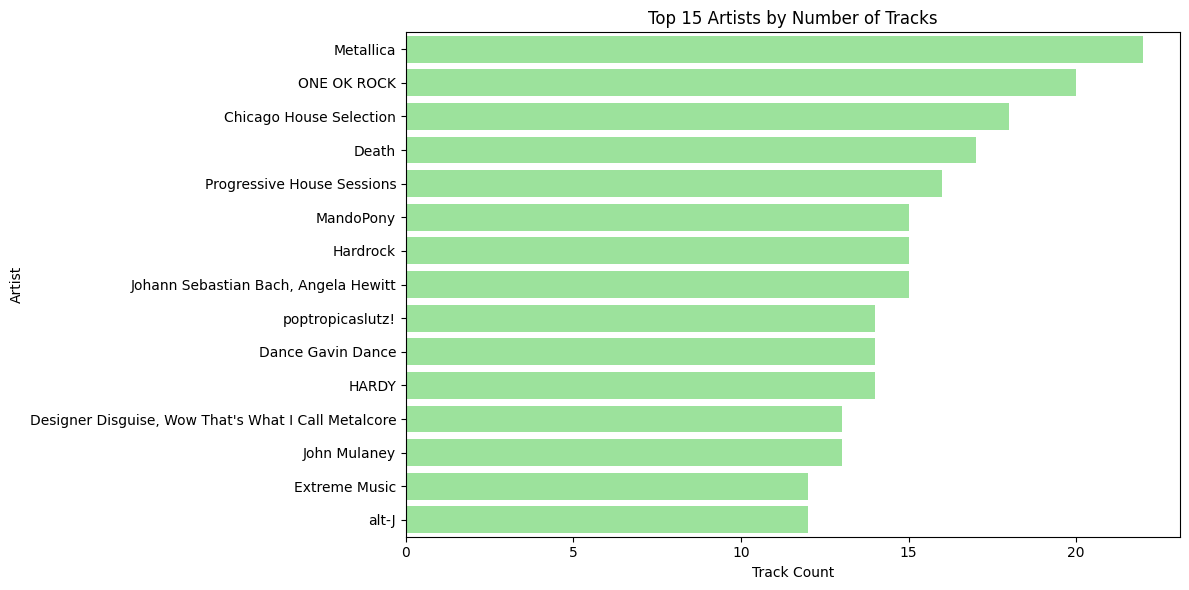

In [14]:
# Step 1: Count top 15 artists
top_artists_count = df['artists'].value_counts().head(15).reset_index()
top_artists_count.columns = ['artists', 'track_count']

# Step 2: Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='track_count', y='artists', data=top_artists_count, color='lightgreen')
plt.title("Top 15 Artists by Number of Tracks")
plt.xlabel("Track Count")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

This chart highlights the most prolific artists in the dataset based on track count. "Metallica" and "ONE OK ROCK" top the list, suggesting their extensive discographies and strong dataset presence.

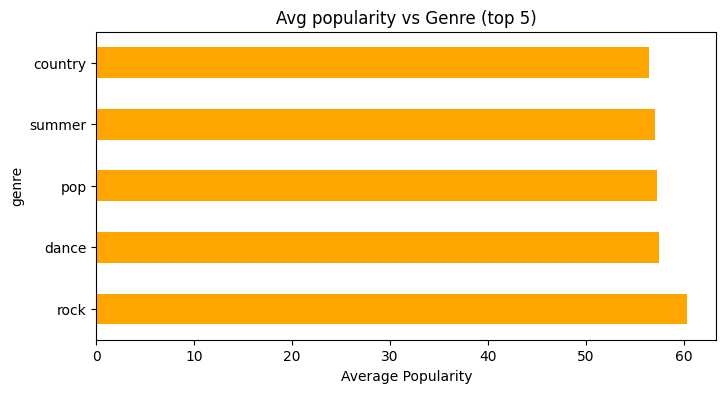

In [15]:
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(5)
genre_popularity.plot(kind='barh', figsize=(8, 4), color='orange')
plt.title("Avg popularity vs Genre (top 5)")
plt.xlabel("Average Popularity")
plt.show()

This chart ranks the top 5 genres based on average track popularity. Rock leads the way, followed closely by dance and pop, indicating their strong listener appeal.

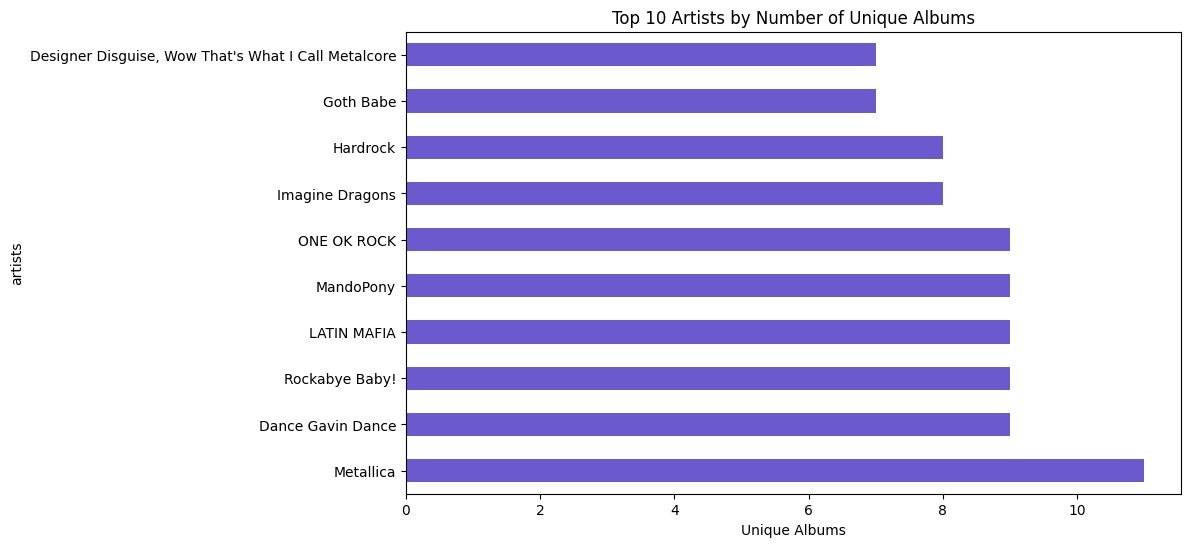

In [16]:
album_counts = df.groupby('artists')['album'].nunique().sort_values(ascending=False).head(10)
album_counts.plot(kind='barh', figsize=(10, 6), color='slateblue')
plt.title("Top 10 Artists by Number of Unique Albums")
plt.xlabel("Unique Albums")
plt.show()



This chart visualizes the artists with the most unique albums. "Metallica" stands out with the highest number of distinct albums, reflecting a diverse and sustained music production over time.